In [ ]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

#Part A: Analysis on California test scores



In [ ]:
df=pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv')
df.head()

,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


###QUICK VISUALS

In [ ]:
y = df['testscr']

# Scatter plot for 'teachers' vs. target
plt.figure(figsize=(8, 6))
plt.scatter(df['teachers'],y , alpha=0.5)
plt.title('Dependency of Target on Number of Teachers')
plt.xlabel('Number of Teachers')
plt.ylabel('Target')
plt.grid()
plt.show()

# Scatter plot for 'avginc' vs. target
plt.figure(figsize=(8, 6))
plt.scatter(df['avginc'], y, alpha=0.5)
plt.title('Dependency of Target on Average Income')
plt.xlabel('Average Income')
plt.ylabel('Target')
plt.grid()
plt.show()

# Scatter plot for 'elpct' vs. target
plt.figure(figsize=(8, 6))
plt.scatter(df['elpct'], y, alpha=0.5)
plt.title('Dependency of Target on ELPCT')
plt.xlabel('ELPCT Percentage')
plt.ylabel('Target')
plt.grid()
plt.show()


NameError: name 'df' is not defined

## Data prep.

###Split the data into training and test sets.



In [ ]:
y = df['testscr']
X = df.loc[:, df.columns.isin(['tenrltot', 'teachers', 'calwpct','mealpct','computer','expnstu','avginc','elpct'])]
#Train test split
from sklearn.model_selection import train_test_split

# Use train_test_split(X,y) to create four new data sets, defaults to .75/.25 split
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X.shape)
X_train.shape

(420, 7)


(315, 7)

###Scale the data with StandardScaler()

In [ ]:
from sklearn import preprocessing


scaler = preprocessing.StandardScaler().fit(X_train)
# Here we apply the fit standard scaler to the X_train data using transform()
X_train_scaled= scaler.transform(X_train)
# apply the same scaler to x_test
X_test_scaled=scaler.transform(X_test)

## Regressions

###KNN Regression with cross validation


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from statistics import mean
from sklearn.model_selection import KFold


# KNeighborsRegressor cross-validation
kfold = KFold(n_splits=5)
print("KFold KNeighborsRegressor:\n{}".format(
    mean(cross_val_score(KNeighborsRegressor(n_neighbors=5), X_train_scaled, y_train, cv=kfold))
))


KFold KNeighborsRegressor:
0.7366337801498831


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression


# lr.fit(X_train, y_train)# training the model - but this step is included in the CV


# Linear Regression cross-validation
print('Linear Regression score:')
print(np.mean(cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=10, scoring="r2")))

Linear Regression score:
0.7813560534737085


###Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# Ridge Regression cross-validation
ridge = Ridge()  # Initialize Ridge regression model
ridge_cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='r2')
print("Ridge Regression - Average R² (5-fold CV):", mean(ridge_cv_scores))



Ridge Regression - Average R² (5-fold CV): 0.7830235889476438


###Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
# Lasso Regression cross-validation
lasso = Lasso()  # Initialize Lasso regression model
lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='r2')
print("Lasso Regression - Average R² (5-fold CV):", mean(lasso_cv_scores))

Lasso Regression - Average R² (5-fold CV): 0.7834671842802633


##Tune the parameters of the models where possible using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# KNeighborsRegressor Grid Search
knn_param_grid = {'n_neighbors': [3, 5, 7, 9]}  # Example grid
knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5, scoring='r2')
knn_grid_search.fit(X_train_scaled, y_train)
print(f"KNeighborsRegressor best parameters: {knn_grid_search.best_params_}")
print(f"KNeighborsRegressor best cross-validation score: {knn_grid_search.best_score_}")

# Linear Regression (No hyperparameters to tune)

# Ridge Regression Grid Search
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0]}  # Example grid for regularization strength
ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=5, scoring='r2')
ridge_grid_search.fit(X_train_scaled, y_train)
print(f"Ridge Regression best parameters: {ridge_grid_search.best_params_}")
print(f"Ridge Regression best cross-validation score: {ridge_grid_search.best_score_}")

# Lasso Regression Grid Search
lasso_param_grid = {'alpha': [0.1, 1.0, 10.0]}  # Example grid for regularization strength
lasso_grid_search = GridSearchCV(Lasso(), lasso_param_grid, cv=5, scoring='r2')
lasso_grid_search.fit(X_train_scaled, y_train)
print(f"Lasso Regression best parameters: {lasso_grid_search.best_params_}")
print(f"Lasso Regression best cross-validation score: {lasso_grid_search.best_score_}")

KNeighborsRegressor best parameters: {'n_neighbors': 7}
KNeighborsRegressor best cross-validation score: 0.7503495515818971
Ridge Regression best parameters: {'alpha': 10.0}
Ridge Regression best cross-validation score: 0.7852210261354406
Lasso Regression best parameters: {'alpha': 0.1}
Lasso Regression best cross-validation score: 0.7851332591703392



###Compare the coefficients of Lasso and Ridge.

In [ ]:
# Ridge Regression
ridge = Ridge()  # Initialize Ridge regression model
ridge.fit(X_train_scaled, y_train)  # Fit the model
ridge_cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='r2')
print("Ridge Regression - Average R² (5-fold CV):", mean(ridge_cv_scores))

# Get coefficients for Ridge
if hasattr(X_train, 'columns'):
    feature_names = X_train.columns
else:
    feature_names = np.arange(X_train_scaled.shape[1])

# Print Ridge coefficients
print("\nRidge Regression Coefficients:")
for name, coef in zip(feature_names, ridge.coef_):
    print(f"Feature: {name}, Coefficient: {coef:.4f}")

# Lasso Regression
lasso = Lasso()  # Initialize Lasso regression model
lasso.fit(X_train_scaled, y_train)  # Fit the model
lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='r2')
print("Lasso Regression - Average R² (5-fold CV):", mean(lasso_cv_scores))

# Get coefficients for Lasso
# Print Lasso coefficients
print("\nLasso Regression Coefficients:")
for name, coef in zip(feature_names, lasso.coef_):
    print(f"Feature: {name}, Coefficient: {coef:.4f}")


Ridge Regression - Average R² (5-fold CV): 0.7830235889476438

Ridge Regression Coefficients:
Feature: teachers, Coefficient: -1.0359
Feature: calwpct, Coefficient: -0.5278
Feature: mealpct, Coefficient: -10.3472
Feature: computer, Coefficient: 0.7644
Feature: expnstu, Coefficient: 1.6365
Feature: avginc, Coefficient: 4.7980
Feature: elpct, Coefficient: -3.5414
Lasso Regression - Average R² (5-fold CV): 0.7834671842802633

Lasso Regression Coefficients:
Feature: teachers, Coefficient: -0.0000
Feature: calwpct, Coefficient: -0.0000
Feature: mealpct, Coefficient: -10.7035
Feature: computer, Coefficient: -0.0000
Feature: expnstu, Coefficient: 0.8139
Feature: avginc, Coefficient: 4.3777
Feature: elpct, Coefficient: -2.8095


#Part B: Classification on red and white wine characteristics


In [ ]:
red=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')
white=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

## Prep Data and EDA

In [ ]:
red['winetype'] = 1
white['winetype'] = 0
wine = pd.concat([red, white], axis=0, ignore_index=True)
wine.reset_index(drop=True, inplace=True)
wine.head()
target=wine['winetype']


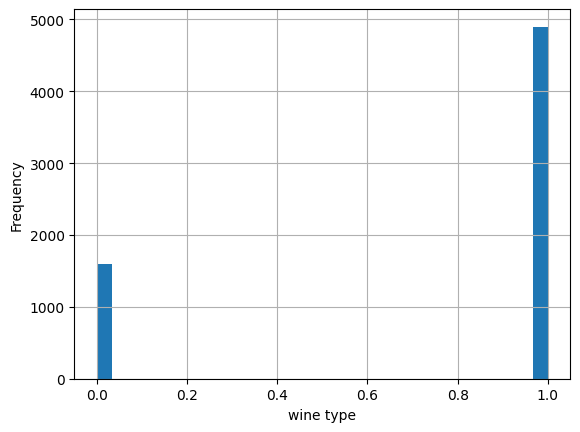

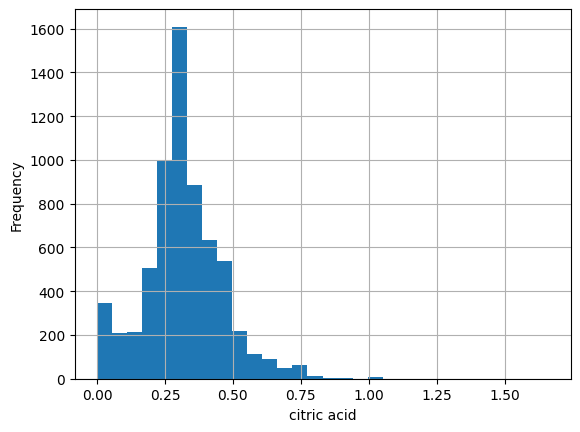

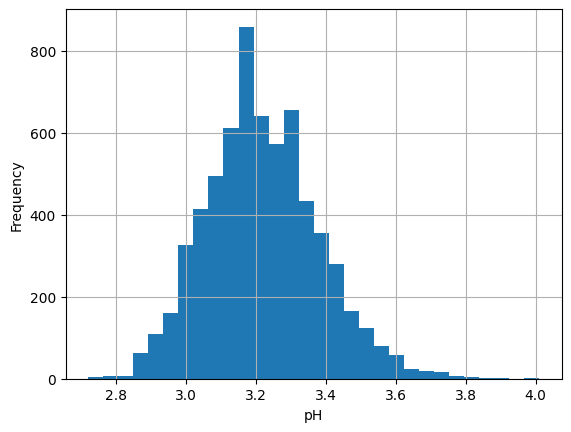

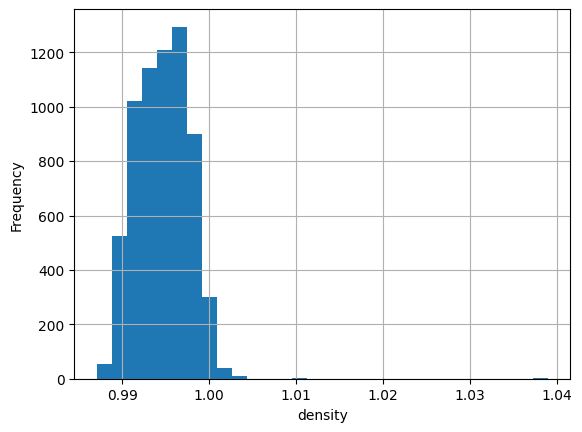

In [ ]:

plt.figure()
target.hist(bins=30)
plt.xlabel('wine type')
plt.ylabel('Frequency')
plt.show()


plt.figure()
wine['citric acid'].hist(bins=30)
plt.xlabel('citric acid')
plt.ylabel('Frequency')
plt.show()

plt.figure()
wine['pH'].hist(bins=30)
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()


plt.figure()
wine['density'].hist(bins=30)
plt.xlabel('density')
plt.ylabel('Frequency')
plt.show()

##Split data into training and test sets.


In [ ]:
x2 = wine.loc[:, ~wine.columns.isin(['winetype'])]

# Use train_test_split(X,y) to create four new data sets, defaults to .75/.25 split
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, target, random_state=42)

## StandardScaler

In [ ]:

scaler = preprocessing.StandardScaler().fit(X2_train)
# Here we apply the fit standard scaler to the X_train data using transform()
X2_train_scaled= scaler.transform(X2_train)
# apply the same scaler to x_test
X2_test_scaled=scaler.transform(X2_test)

In [ ]:
#not penalized logisitic regression:
from sklearn.linear_model import LogisticRegression

print('log reg non penalized:')
logreg = LogisticRegression(penalty=None, max_iter=1000)
# Perform 5-fold cross-validation (or any number of folds you want) using accuracy as the scoring metric
cv2_scores = cross_val_score(logreg, X2_train_scaled, y2_train, cv=5, scoring='accuracy')
print(">>Mean cross-validation score: {:.4f}".format(mean(cv2_scores)))




#Logistic Regression penalized:
from sklearn.linear_model import LogisticRegression
print('log reg penalized:')
logreg = LogisticRegression(penalty='l2', max_iter=1000)
cv3_scores = cross_val_score(logreg, X2_train_scaled, y2_train, cv=5, scoring='accuracy')
print(">>Mean cross-validation score: {:.4f}".format(mean(cv3_scores)))



#KNN with CV
from sklearn.neighbors import KNeighborsClassifier  # Classification instead of regression
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold

kfold = KFold(n_splits=5)
rkf = RepeatedKFold(n_splits=5, n_repeats=10)
print("Knn: KFold (Classification):\n{}".format(mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X2_train_scaled, y2_train, cv=kfold))))




log reg non penalized:
>>Mean cross-validation score: 0.9936
log reg penalized:
>>Mean cross-validation score: 0.9934
Knn: KFold (Classification):
0.9930210077396936


##Tune the parameters of the models where possible using GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV
para_grid={'n_neighbors': np.arange(1, 15,2)}
knn_grid=GridSearchCV(KNeighborsClassifier(),para_grid,cv=5,scoring='accuracy')
knn_grid.fit(X2_train_scaled,y2_train)

print(knn_grid.best_params_)
print(knn_grid.best_score_)

{'n_neighbors': 13}
0.9932261359448219


In [ ]:
# Logistic Regression
logreg_param_grid = {
      # Different types of penalties
    'C': [0.01 ,0.1, 1, 10,100 ]  # Regularization strength (inverse)
    }

logreg_grid = GridSearchCV(LogisticRegression(), logreg_param_grid, cv=5, scoring='accuracy')
logreg_grid.fit(X2_train_scaled, y2_train)

print('Logistic Regression:')
print(f"Best parameters: {logreg_grid.best_params_}")
print(f"Best cross-validation score: {logreg_grid.best_score_}")


Logistic Regression:
Best parameters: {'C': 100}
Best cross-validation score: 0.9936366029589848


In [ ]:

# Logistic Regression
logreg_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Different types of penalties
    'C': [.01 ,0.1, 1, 10,100]  # Regularization strength (inverse)
    }

logreg_grid = GridSearchCV(LogisticRegression(), logreg_param_grid, cv=5, scoring='accuracy')
logreg_grid.fit(X2_train_scaled, y2_train)

print('Logistic Regression:')
print(f"Best parameters: {logreg_grid.best_params_}")
print(f"Best cross-validation score: {logreg_grid.best_score_}")




Logistic Regression:
Best parameters: {'C': 100, 'penalty': 'l2'}
Best cross-validation score: 0.9936366029589848


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

▶ Based on the result, we can see that it provides a similar outcome to the original regression before performing the grid search. However, since the original scores were already quite high (around 99%), this consistency in the result is understandable and expected.

###Compare the coefficients for Logistic Regression and Penalized Logistic Regression

In [ ]:

# Fit your model (e.g., Logistic Regression)
logreg = LogisticRegression(penalty='l2', max_iter=1000)
logreg.fit(X2_train_scaled, y2_train)

# Assuming X2_train is a DataFrame and has column names
feature_names = X2_train.columns  # Get the column names from the original DataFrame

# Print the coefficients with their corresponding feature names
coefficients = logreg.coef_[0]  # coef_ returns a 2D array, take the first row if binary classification
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")


fixed acidity: -0.3823375086491316
volatile acidity: -1.2868908952407139
citric acid: 0.3653157573569147
residual sugar: 3.5347298570880636
chlorides: -0.8009494497447539
free sulfur dioxide: -0.9132636421822659
total sulfur dioxide: 2.9122833106573687
density: -3.4523242267872316
pH: -0.3385225231804791
sulphates: -0.6484472655829139
alcohol: -1.1813566088053824
quality: -0.1681438618916688


In [ ]:
# Fit your model (e.g., Logistic Regression)
logreg = LogisticRegression(penalty=None, max_iter=1000)
logreg.fit(X2_train_scaled, y2_train)

# Assuming X2_train is a DataFrame and has column names
feature_names = X2_train.columns  # Get the column names from the original DataFrame

# Print the coefficients with their corresponding feature names
coefficients = logreg.coef_[0]  # coef_ returns a 2D array, take the first row if binary classification
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")


fixed acidity: 0.35632040955947253
volatile acidity: -1.169434990618122
citric acid: 0.47646879346258103
residual sugar: 5.676663880154608
chlorides: -0.7714793516225169
free sulfur dioxide: -1.4423494254276918
total sulfur dioxide: 3.34200522406662
density: -5.695553501388688
pH: 0.2647652828373186
sulphates: -0.4532897642048738
alcohol: -2.290214648286054
quality: -0.1813927078171807
